In [93]:
import numpy as np
import cv2
from PIL import Image

data = Image.open('./images/cats/cat_1.jpg')

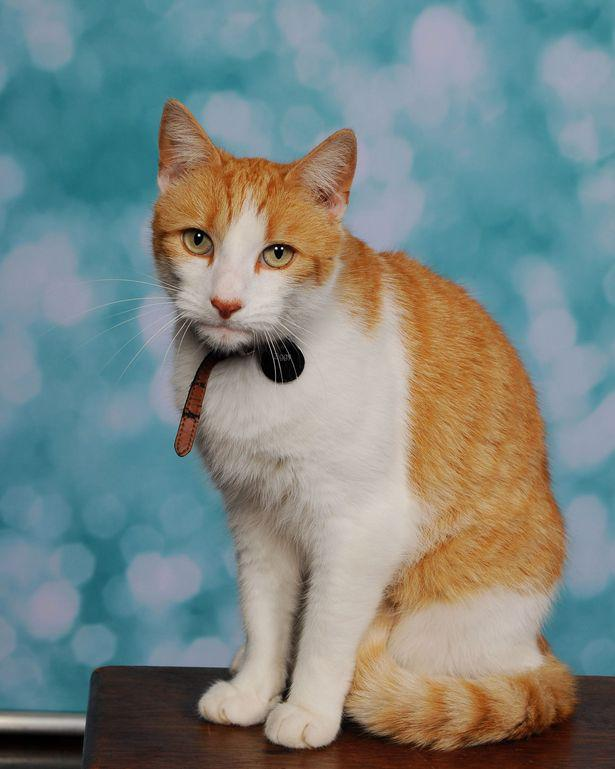

In [94]:
data

In [95]:
np.array(data)

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [96]:
import os
from pathlib import Path
path_dict = {'cats':[],'dogs':[]}
base_directory = r"./images"

for dir_name in os.listdir(base_directory): 
    dir_path = Path(os.path.join(base_directory,dir_name))
    print(dir_path)
    for image_name in os.listdir(dir_path):  
        path_dict[dir_name].append(os.path.join(str(dir_path),image_name))
    

images\cats
images\dogs


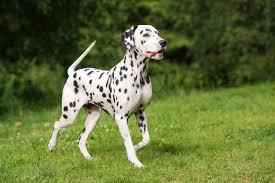

In [97]:
Image.open(path_dict['dogs'][20])

In [105]:

x = [] 
y = [] 
for class_name,paths in path_dict.items(): 
    for path in paths:
        sample_img = cv2.imread(path) 
        reduced_img = cv2.resize(sample_img,(224,224))
        x.append(reduced_img) 
        y.append(class_name) 

In [106]:
len(x),len(y)

(697, 697)

In [107]:
set(y)

{'cats', 'dogs'}

In [108]:
map = {'cats': 1, 'dogs': 0}
y = [map[label] for label in y]

In [109]:
set(y)

{0, 1}

In [110]:
type(y)

list

In [111]:
X = np.array(x)
Y = np.array(y)

In [112]:
X.ndim

4

In [113]:
type(X)   , type(Y)  

(numpy.ndarray, numpy.ndarray)

In [114]:
X.shape

(697, 224, 224, 3)

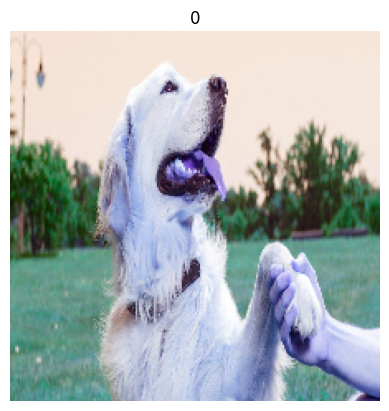

In [119]:
import matplotlib.pyplot as plt
plt.imshow(X[455]) 
plt.title(y[455])
plt.axis('off')
plt.show() 

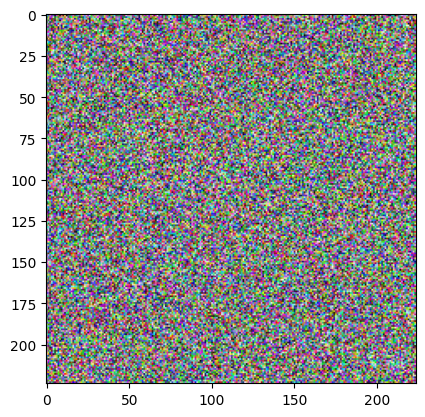

In [120]:
plt.imshow(np.random.randint(0,255,(224,224,3)))

In [121]:
X = X/255.0 

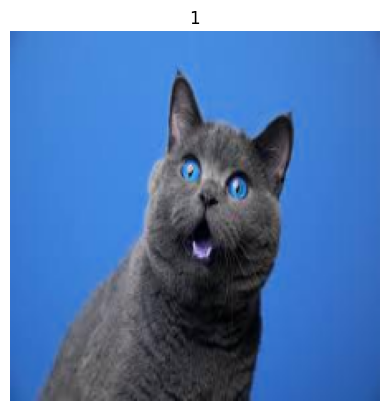

In [122]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler 
plt.imshow(x[255]) 
plt.title(y[255])
plt.axis('off')
plt.show() 

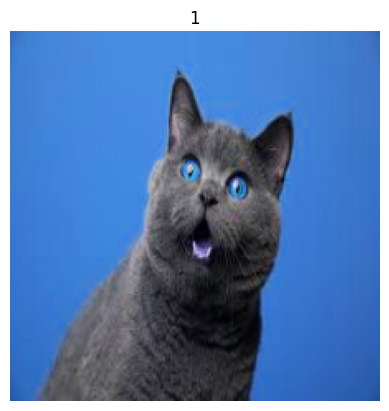

In [123]:
plt.imshow(X[255])   
plt.title(y[255])
plt.axis('off')
plt.show() 

In [124]:
from sklearn.model_selection import  train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

In [125]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

cnn_model = Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(30, (3,3), activation='relu'),

    layers.Flatten(),

    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

c:\Users\rawso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 40)   │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 30)     │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │     3,650,445 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,687,276 (14.07 MB)

 Trainable params: 3,687,276 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
history = cnn_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 691ms/step - accuracy: 0.8072 - loss: 0.4030 - val_accuracy: 0.5905 - val_loss: 0.8700
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 685ms/step - accuracy: 0.9346 - loss: 0.1938 - val_accuracy: 0.7048 - val_loss: 0.6893
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 682ms/step - accuracy: 0.9345 - loss: 0.1901 - val_accuracy: 0.6476 - val_loss: 1.1035
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 688ms/step - accuracy: 0.9747 - loss: 0.0840 - val_accuracy: 0.7048 - val_loss: 1.3551
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 692ms/step - accuracy: 0.9938 - loss: 0.0303 - val_accuracy: 0.6952 - val_loss: 1.4296


<Axes: >

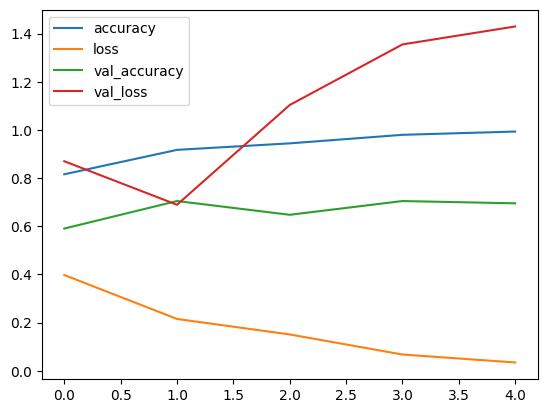

In [128]:
import pandas as pd 

pd.DataFrame(history.history).plot()

In [129]:
prediction = cnn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step


In [130]:
prediction.shape   , x_test.shape 

((105, 1), (105, 224, 224, 3))

In [131]:
pred = (prediction >0.5).astype(int).ravel()

In [132]:
pred 

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [133]:
compare_df = pd.DataFrame({"Actual":y_test,"prediction":pred})
compare_df.head() 

,Actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1


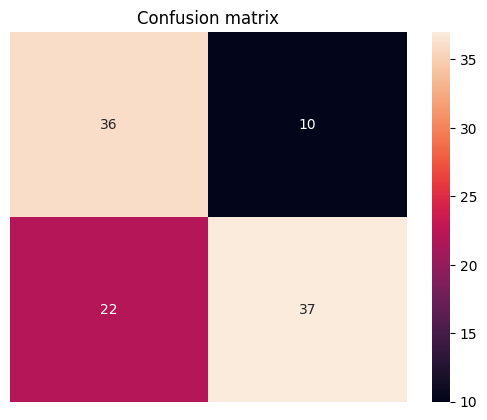


Classification report!
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        46
           1       0.79      0.63      0.70        59

    accuracy                           0.70       105
   macro avg       0.70      0.70      0.70       105
weighted avg       0.71      0.70      0.70       105



In [135]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report 
matrix = confusion_matrix(compare_df['Actual'],compare_df['prediction'])

sns.heatmap(matrix,annot=True , fmt='d') 
plt.title("Confusion matrix")
plt.axis('off')
plt.show() 


print()
print("Classification report!")
print(classification_report(compare_df['Actual'],compare_df['prediction']))

In [136]:
compare_df.to_csv('predicted.csv',index=False) 
cnn_model.save('cnn_model.h5') 
print("successfully saved your models! ")

successfully saved your models! 


,Actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
100,0,0
101,1,1
102,0,0
103,1,0
